In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import pylab as p
import matplotlib.pyplot as plt

In [74]:
# 4 node example 1
G = nx.DiGraph()
V = {'1', '2', '3', '4'}
E = [('1','2'), ('1','3'), ('3','4'), ('2','4')]
G.add_nodes_from(V)
G.add_edges_from(E)

In [4]:
# plot graphs
def draw_graph(G, nodes_position, weight):
    nx.draw(G, nodes_position, with_labels=True, font_size=8, node_size=800, edge_color='gray', arrowsize=30)
    if weight:
        edge_labels=nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, nodes_position, edge_labels=edge_labels)   

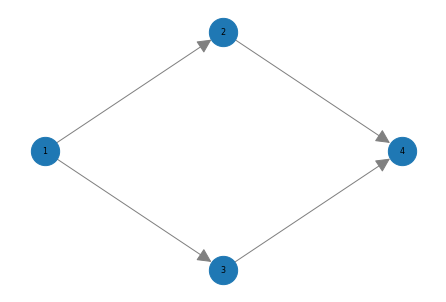

In [5]:
node_position = {'1': [1,1], '2': [2,2], '3': [2,0], '4': [3,1]}
#node_position = {"A": [0,0], "B": [0,1], "C": [1,0], "D": [1,1], "E":[0,5]}
draw_graph(G, node_position, True)

In [31]:
def getMinPriceSuccNode(kNode,Path):
     # list the immediate nodes at distance of 1
    
                
    availablePath = list(G.successors(kNode))
    
    
    availablepathPrice = {}
        # get the price of all the nodes in available path 
    for (key, value) in nodePrice.items():
        for i in range(len(availablePath)):
            if key == availablePath[i]:
                availablepathPrice[key]= value

    #print("the price of available nodes is:", availablepathPrice)

        # find the minimum price and the node
    
    choseNode = {k:v for k, v in availablepathPrice.items() if k not in highpriceNode }
    #print("\nThe new nodes chosen are:",choseNode)  
    if choseNode != {}:
        minPrice = min(choseNode.values())
        minNode = [k for k, v in choseNode.items() if v==minPrice]
       # print("\nThe new min node chosen is:",minNode)  
        succNode = minNode[0]
       # print("The successor node is:",succNode )
    else:
        if kNode==source:
            succNode=kNode
           # print("reached source, no path available")
        else:
            nodePrice[kNode]= 1000000
            highpriceNode.append(kNode)
            Path=Path[:-1]
            pathLength=len(Path)
            kNode = Path[pathLength-1] 
            kNode, succNode,Path=getMinPriceSuccNode(kNode,Path)
            
    return kNode, succNode,Path

In [105]:
def update_price(Path):
    reached_targets=[]
    j=0
    i=0
    while True:
        pathLength=len(Path)
        if pathLength!=0:
            kNode = Path[pathLength-1]
            
            kPath = list(G.successors(kNode))
            if len(kPath)==0 and kNode !=source:
                nodePrice[kNode]= 1000000
                highpriceNode.append(kNode)
                print("Terminal node reached, set the price to infinity and contract - remove the node")
                Path=Path[:-1]
                print("The new path is", Path)
                pathLength=len(Path)
                kNode = Path[pathLength-1] 
                draw_color(Path)
                
            
            kNode,succNode, Path = getMinPriceSuccNode(kNode, Path)
                
        print("The path is:", Path)
        print("The current K node is:", kNode)
        print("The succ node is:", succNode)
        
        pathLength=len(Path)
        
#         if pathLength==1:
#             print("reached source")
#             break
        
            
        if pathLength<2 and kNode==source:
            nodePrice[kNode]=max(nodePrice[kNode],nodePrice[succNode]+1)
            Path.append(succNode)
            print("Downhill Extend path to succ node and update the price of k")
            print("\nThe latest price is:", nodePrice)  
            print("\nThe latest path is:", Path)
            if succNode in target:
                reached_targets.append(succNode)
                j=j+1
                target.remove(succNode)
                print("Path to {} th target is: {}".format(j, Path))
                print("The destination reached are", *reached_targets) 
            draw_color(Path)
            
        elif pathLength>=2:
            predNode = Path[pathLength-2]  
       
        
             # check prices
                                 
            # 1. downhill - Extend P to succ(k) and set price of k to price of pred(k)
            if nodePrice[succNode]<nodePrice[kNode]:
                print("Downhill Extend path to succ node and set the price of k to pred node")
                nodePrice[kNode]=nodePrice[predNode]
                Path.append(succNode)
                print("\nThe latest price is:", nodePrice)  
                print("\nThe latest path is:", Path)
                if succNode in target:
                    reached_targets.append(succNode)
                    j=j+1
                    target.remove(succNode)
                    print("Path to {} th target is: {}".format(j, Path))
                print("The destination reached are", *reached_targets) 
                draw_color(Path)
                
            # 2. uphill - contract path and raise the price of k to the succ(k)+1
            elif nodePrice[succNode] > nodePrice[kNode]:
                print("\n Uphill- contract and update the price")
                nodePrice[kNode]=nodePrice[succNode]+1
                print("\nThe updated price is:", nodePrice)  
                Path=Path[:-1]
                print("\nRemoving the high price node:", kNode)
                print("The updated Path is:", Path)
                

                draw_color(Path)
        
             # 3. level - has 2 conditions to avoid the loop
            elif nodePrice[kNode] == nodePrice[succNode]:
             
                # 3.a if pred(k) has higher price than k - extend to succ(k) and raise price of k to pred(k)
                if nodePrice[predNode] > nodePrice[kNode] :
                    print("\nsame level Case 1 - Extend to succ node and update the price of k to pred node")
                    nodePrice[kNode]=nodePrice[predNode]
                    print("\nThe updated price is:", nodePrice) 
                    Path.append(succNode)
                    print("The updated Path is:", Path)
                    if succNode in target:
                        reached_targets.append(succNode)
                        j=j+1
                        target.remove(succNode)
                        print("Path to {} th target is: {}".format(j, Path))
                        print("The destination reached are", *reached_targets) 
                    draw_color(Path)
            
                # 3.b if price of pred(k) is same as k
                elif (nodePrice[predNode] == nodePrice[kNode]):
                    print("\nsame level Case 2- Contract, remove the node and update the price")
                    nodePrice[kNode]=nodePrice[kNode]+1
                    Path=Path[:-1]
                    print("\nRemoving the high price node:", kNode)
                    print("The updated Path is:", Path)

                    draw_color(Path)
                    
                
                
                
        i=i+1  
 
        
        if target == []:
            print("all destination reached")
            print("\nThe path is:", Path)
            print("The price of each node is:", nodePrice)
            #print("The high price nodes:",highpriceNode )
            print("The number of steps", i)
            print("The destination reached are", *reached_targets)
            draw_color(Path)
            break
         

In [61]:
def update_price_a(Path):
    reached_targets=[]
    j=0
    i=0
    while True:
        pathLength=len(Path)
        if pathLength!=0:
            kNode = Path[pathLength-1]
            
            kPath = list(G.successors(kNode))
            if len(kPath)==0 and kNode !=source:
                nodePrice[kNode]= 1000000
                highpriceNode.append(kNode)
                #print("Terminal node reached, set the price to infinity and contract - remove the node")
                Path=Path[:-1]
                #print("The new path is", Path)
                pathLength=len(Path)
                kNode = Path[pathLength-1]    
                
            
            kNode,succNode, Path = getMinPriceSuccNode(kNode, Path)
                
#         print("The path is:", Path)
#         print("The current K node is:", kNode)
#         print("The succ node is:", succNode)
        
        pathLength=len(Path)
        
#         if pathLength==1:
#             print("reached source")
#             break
        
            
        if pathLength<2 and kNode==source:
            nodePrice[kNode]=max(nodePrice[kNode],nodePrice[succNode]+1)
            Path.append(succNode)
#             print("Downhill Extend path to succ node and update the price of k")
#             print("\nThe latest price is:", nodePrice)  
#             print("\nThe latest path is:", Path)
            if succNode in target:
                reached_targets.append(succNode)
                j=j+1
                target.remove(succNode)
#                 print("Path to {} th target is: {}".format(j, Path))
#                 print("The destination reached are", *reached_targets) 
            #draw_color(Path)
            
        elif pathLength>=2:
            predNode = Path[pathLength-2]  
       
        
             # check prices
                                 
            # 1. downhill - Extend P to succ(k) and set price of k to price of pred(k)
            if nodePrice[succNode]<nodePrice[kNode]:
                #print("Downhill Extend path to succ node and set the price of k to pred node")
                nodePrice[kNode]=nodePrice[predNode]
                Path.append(succNode)
#                 print("\nThe latest price is:", nodePrice)  
#                 print("\nThe latest path is:", Path)
                if succNode in target:
                    reached_targets.append(succNode)
                    j=j+1
                    target.remove(succNode)
#                     print("Path to {} th target is: {}".format(j, Path))
#                 print("The destination reached are", *reached_targets) 
                #draw_color(Path)
                
            # 2. uphill - contract path and raise the price of k to the succ(k)+1
            elif nodePrice[succNode] > nodePrice[kNode]:
               # print("\n Uphill- contract and update the price")
                nodePrice[kNode]=nodePrice[succNode]+1
                #print("\nThe updated price is:", nodePrice)  
                Path=Path[:-1]
#                 print("\nRemoving the high price node:", kNode)
#                 print("The updated Path is:", Path)
                

                #draw_color(Path)
        
             # 3. level - has 2 conditions to avoid the loop
            elif nodePrice[kNode] == nodePrice[succNode]:
             
                # 3.a if pred(k) has higher price than k - extend to succ(k) and raise price of k to pred(k)
                if nodePrice[predNode] > nodePrice[kNode] :
                    #print("\nsame level Case 1 - Extend to succ node and update the price of k to pred node")
                    nodePrice[kNode]=nodePrice[predNode]
                    #print("\nThe updated price is:", nodePrice) 
                    Path.append(succNode)
                    #print("The updated Path is:", Path)
                    if succNode in target:
                        reached_targets.append(succNode)
                        j=j+1
                        target.remove(succNode)
#                         print("Path to {} th target is: {}".format(j, Path))
#                         print("The destination reached are", *reached_targets) 
                    #draw_color(Path)
            
                # 3.b if price of pred(k) is same as k
                elif (nodePrice[predNode] == nodePrice[kNode]):
                    #print("\nsame level Case 2- Contract, remove the node and update the price")
                    nodePrice[kNode]=nodePrice[kNode]+1
                    Path=Path[:-1]
#                     print("\nRemoving the high price node:", kNode)
#                     print("The updated Path is:", Path)

                    #draw_color(Path)
                    
                
                
        draw_color(Path)        
        i=i+1  
 
        
        if target == []:
#             print("all destination reached")
#             print("\nThe path is:", Path)
#             print("The price of each node is:", nodePrice)
#             #print("The high price nodes:",highpriceNode )
#             print("The number of steps", i)
#             print("The destination reached are", *reached_targets)
            #draw_color(Path)
            break
         

In [75]:

source = "1"
#target= "4"
# multiple targets
target=["2", "4"]

# keep a track of current nodes Path
Path=[]
Path.append(source)

# create a list of high price nodes
highpriceNode =[]
#target = [int(x) for x in target]

In [76]:
# initialize zero price
nodePrice = {'1':0 , '2':0, '3':0, '4':0}

In [77]:
Path

['1']

In [78]:
def draw_color(Path):
    path=[str(x) for x in Path]
    high = [str(x) for x in highpriceNode]
    color_map = ['green' if node in path else 'red' if node in high else 'blue' for node in G]        
    graph = nx.draw_networkx(G,node_position, node_color=color_map) # node lables
    plt.pause(1.0)
    plt.show()

The path is: ['1']
The current K node is: 1
The succ node is: 2
Downhill Extend path to succ node and update the price of k

The latest price is: {'1': 1, '2': 0, '3': 0, '4': 0}

The latest path is: ['1', '2']
Path to 1 th target is: ['1', '2']
The destination reached are 2


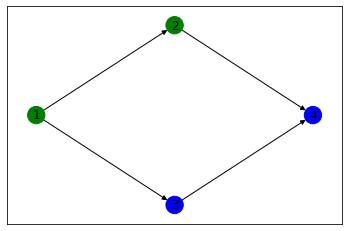

The path is: ['1', '2']
The current K node is: 2
The succ node is: 4

same level Case 1 - Extend to succ node and update the price of k to pred node

The updated price is: {'1': 1, '2': 1, '3': 0, '4': 0}
The updated Path is: ['1', '2', '4']
Path to 2 th target is: ['1', '2', '4']
The destination reached are 2 4


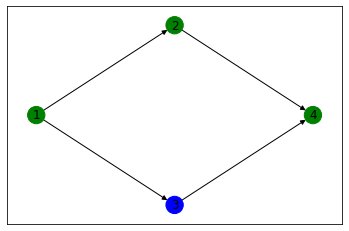

all destination reached

The path is: ['1', '2', '4']
The price of each node is: {'1': 1, '2': 1, '3': 0, '4': 0}
The number of steps 2
The destination reached are 2 4


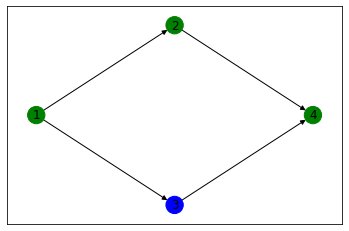

In [79]:
update_price(Path)

In [80]:

source = "1"
#target= "4"
# multiple targets
target=["2", "4"]

# keep a track of current nodes Path
Path=[]
Path.append(source)

# create a list of high price nodes
highpriceNode =[]
#target = [int(x) for x in target]


# 4-node example with different price
# initialize zero price
nodePrice = {'1':0 , '2':3, '3':0, '4':0}

The path is: ['1']
The current K node is: 1
The succ node is: 3
Downhill Extend path to succ node and update the price of k

The latest price is: {'1': 1, '2': 3, '3': 0, '4': 0}

The latest path is: ['1', '3']


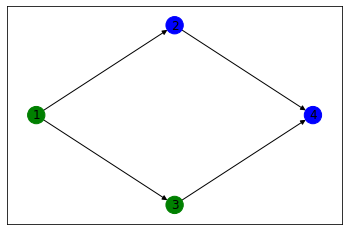

The path is: ['1', '3']
The current K node is: 3
The succ node is: 4

same level Case 1 - Extend to succ node and update the price of k to pred node

The updated price is: {'1': 1, '2': 3, '3': 1, '4': 0}
The updated Path is: ['1', '3', '4']
Path to 1 th target is: ['1', '3', '4']
The destination reached are 4


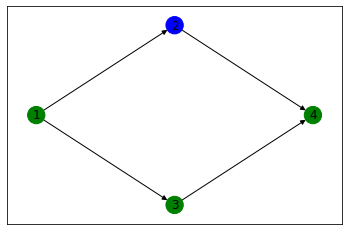

Terminal node reached, set the price to infinity and contract - remove the node
The new path is ['1', '3']
The path is: ['1']
The current K node is: 1
The succ node is: 2
Downhill Extend path to succ node and update the price of k

The latest price is: {'1': 4, '2': 3, '3': 1000000, '4': 1000000}

The latest path is: ['1', '2']
Path to 2 th target is: ['1', '2']
The destination reached are 4 2


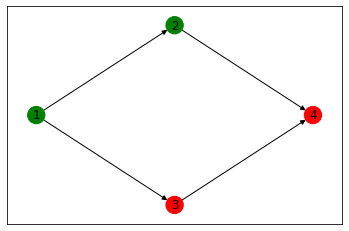

all destination reached

The path is: ['1', '2']
The price of each node is: {'1': 4, '2': 3, '3': 1000000, '4': 1000000}
The number of steps 3
The destination reached are 4 2


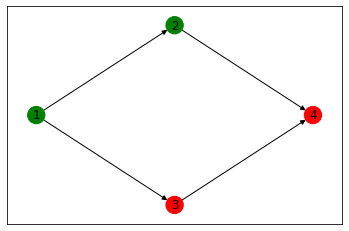

In [81]:
update_price(Path)

In [82]:
# Example 2
# 4 node example 2
G = nx.DiGraph()
V = {'1', '2', '3', '4'}
E = [('1','2'), ('1','3'), ('3','4'), ('4','2')]
G.add_nodes_from(V)
G.add_edges_from(E)


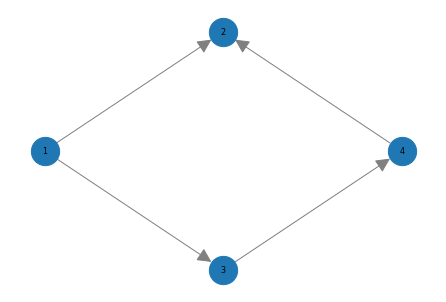

In [83]:
node_position = {'1': [1,1], '2': [2,2], '3': [2,0], '4': [3,1]}
#node_position = {"A": [0,0], "B": [0,1], "C": [1,0], "D": [1,1], "E":[0,5]}
draw_graph(G, node_position, True)

In [84]:
source = "1"
#target= "4"
# multiple targets
target=["2", "4"]

# keep a track of current nodes Path
Path=[]
Path.append(source)

# create a list of high price nodes
highpriceNode =[]

In [85]:
# initialize zero price
nodePrice = {'1':0 , '2':0, '3':0, '4':0}

The path is: ['1']
The current K node is: 1
The succ node is: 2
Downhill Extend path to succ node and update the price of k

The latest price is: {'1': 1, '2': 0, '3': 0, '4': 0}

The latest path is: ['1', '2']
Path to 1 th target is: ['1', '2']
The destination reached are 2


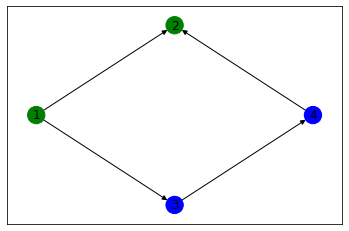

Terminal node reached, set the price to infinity and contract - remove the node
The new path is ['1']
The path is: ['1']
The current K node is: 1
The succ node is: 3
Downhill Extend path to succ node and update the price of k

The latest price is: {'1': 1, '2': 1000000, '3': 0, '4': 0}

The latest path is: ['1', '3']


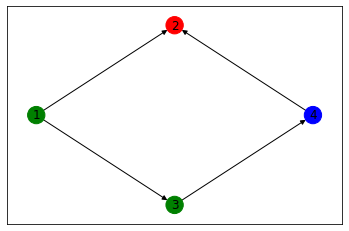

The path is: ['1', '3']
The current K node is: 3
The succ node is: 4

same level Case 1 - Extend to succ node and update the price of k to pred node

The updated price is: {'1': 1, '2': 1000000, '3': 1, '4': 0}
The updated Path is: ['1', '3', '4']
Path to 2 th target is: ['1', '3', '4']
The destination reached are 2 4


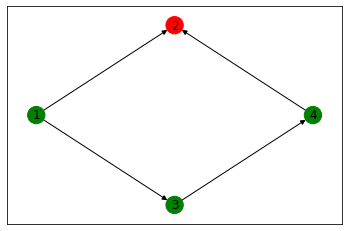

all destination reached

The path is: ['1', '3', '4']
The price of each node is: {'1': 1, '2': 1000000, '3': 1, '4': 0}
The number of steps 3
The destination reached are 2 4


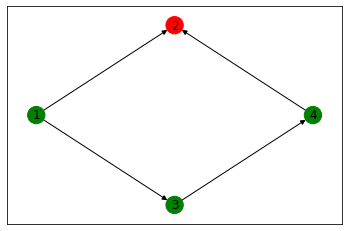

In [86]:
update_price(Path)

In [87]:
source = "1"
#target= "4"
# multiple targets
target=["2", "4"]

# keep a track of current nodes Path
Path=[]
Path.append(source)

# create a list of high price nodes
highpriceNode =[]
# initialize different price sequence
nodePrice = {'1':0 , '2':3, '3':0, '4':0}

The path is: ['1']
The current K node is: 1
The succ node is: 3
Downhill Extend path to succ node and update the price of k

The latest price is: {'1': 1, '2': 3, '3': 0, '4': 0}

The latest path is: ['1', '3']


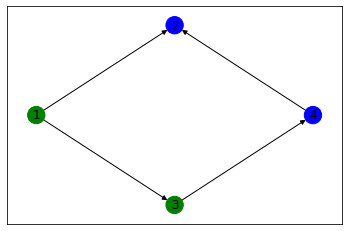

The path is: ['1', '3']
The current K node is: 3
The succ node is: 4

same level Case 1 - Extend to succ node and update the price of k to pred node

The updated price is: {'1': 1, '2': 3, '3': 1, '4': 0}
The updated Path is: ['1', '3', '4']
Path to 1 th target is: ['1', '3', '4']
The destination reached are 4


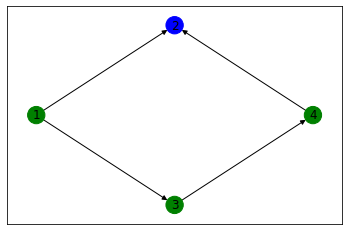

The path is: ['1', '3', '4']
The current K node is: 4
The succ node is: 2

 Uphill- contract and update the price

The updated price is: {'1': 1, '2': 3, '3': 1, '4': 4}

Removing the high price node: 4
The updated Path is: ['1', '3']


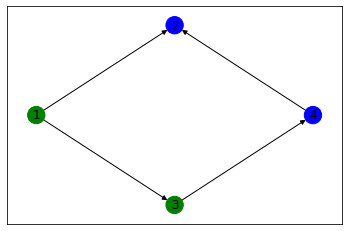

The path is: ['1', '3']
The current K node is: 3
The succ node is: 4

 Uphill- contract and update the price

The updated price is: {'1': 1, '2': 3, '3': 5, '4': 4}

Removing the high price node: 3
The updated Path is: ['1']


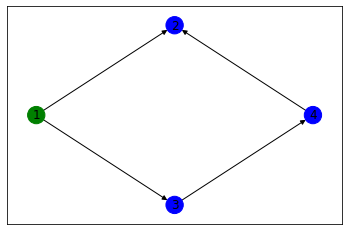

The path is: ['1']
The current K node is: 1
The succ node is: 2
Downhill Extend path to succ node and update the price of k

The latest price is: {'1': 4, '2': 3, '3': 5, '4': 4}

The latest path is: ['1', '2']
Path to 2 th target is: ['1', '2']
The destination reached are 4 2


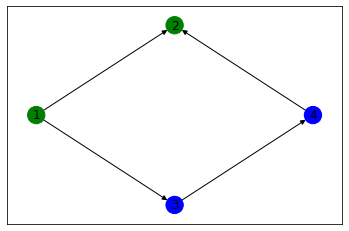

all destination reached

The path is: ['1', '2']
The price of each node is: {'1': 4, '2': 3, '3': 5, '4': 4}
The number of steps 5
The destination reached are 4 2


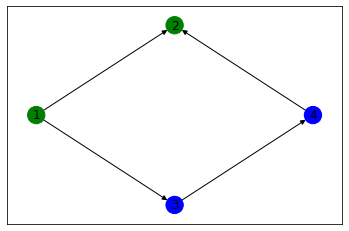

In [88]:
update_price(Path)

In [106]:
# Example 3
# 5 node example 3
G = nx.DiGraph()
V = {'1', '2', '3', '4', '5'}
E = [('1','2'), ('1','3'), ('3','4'), ('4','2'), ('2','5'), ('4','5')]
G.add_nodes_from(V)
G.add_edges_from(E)

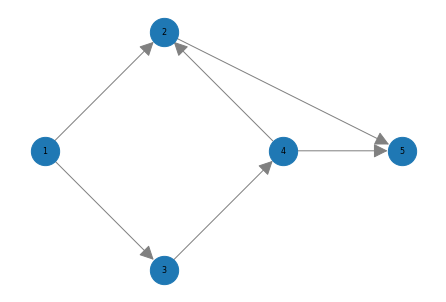

In [107]:
node_position = {'1': [1,1], '2': [2,2], '3': [2,0], '4': [3,1],'5': [4,1] }
draw_graph(G, node_position, True)

In [108]:
nodePrice = {'1':0 , '2':3, '3':0, '4':0, '5':0}

In [109]:
source = "1"
# multiple targets
target=["4", "2", "5"]

# keep a track of current nodes Path
Path=[]
Path.append(source)

# create a list of high price nodes
highpriceNode =[]

The path is: ['1']
The current K node is: 1
The succ node is: 3
Downhill Extend path to succ node and update the price of k

The latest price is: {'1': 1, '2': 3, '3': 0, '4': 0, '5': 0}

The latest path is: ['1', '3']


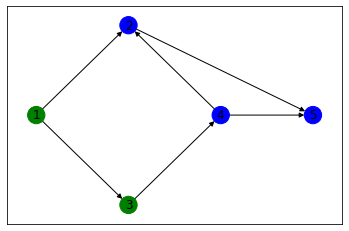

The path is: ['1', '3']
The current K node is: 3
The succ node is: 4

same level Case 1 - Extend to succ node and update the price of k to pred node

The updated price is: {'1': 1, '2': 3, '3': 1, '4': 0, '5': 0}
The updated Path is: ['1', '3', '4']
Path to 1 th target is: ['1', '3', '4']
The destination reached are 4


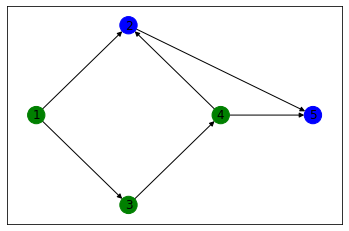

The path is: ['1', '3', '4']
The current K node is: 4
The succ node is: 5

same level Case 1 - Extend to succ node and update the price of k to pred node

The updated price is: {'1': 1, '2': 3, '3': 1, '4': 1, '5': 0}
The updated Path is: ['1', '3', '4', '5']
Path to 2 th target is: ['1', '3', '4', '5']
The destination reached are 4 5


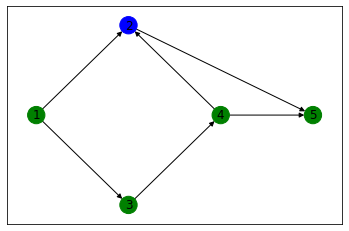

Terminal node reached, set the price to infinity and contract - remove the node
The new path is ['1', '3', '4']


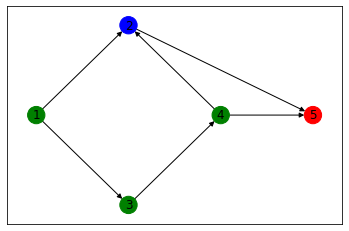

The path is: ['1', '3', '4']
The current K node is: 4
The succ node is: 2

 Uphill- contract and update the price

The updated price is: {'1': 1, '2': 3, '3': 1, '4': 4, '5': 1000000}

Removing the high price node: 4
The updated Path is: ['1', '3']


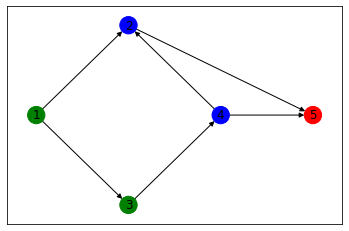

The path is: ['1', '3']
The current K node is: 3
The succ node is: 4

 Uphill- contract and update the price

The updated price is: {'1': 1, '2': 3, '3': 5, '4': 4, '5': 1000000}

Removing the high price node: 3
The updated Path is: ['1']


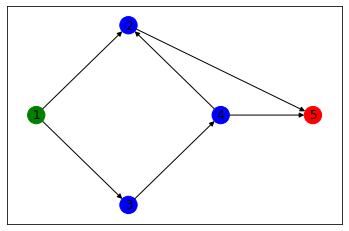

The path is: ['1']
The current K node is: 1
The succ node is: 2
Downhill Extend path to succ node and update the price of k

The latest price is: {'1': 4, '2': 3, '3': 5, '4': 4, '5': 1000000}

The latest path is: ['1', '2']
Path to 3 th target is: ['1', '2']
The destination reached are 4 5 2


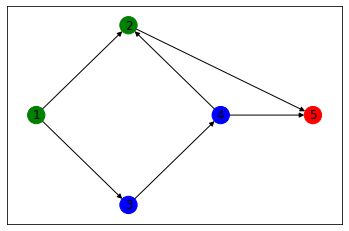

all destination reached

The path is: ['1', '2']
The price of each node is: {'1': 4, '2': 3, '3': 5, '4': 4, '5': 1000000}
The number of steps 6
The destination reached are 4 5 2


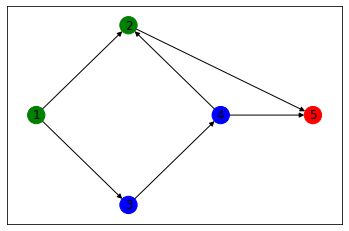

In [110]:
update_price(Path)

In [100]:
# 4 node example 4
G = nx.DiGraph()
V = {'1', '2', '3', '4'}
E = [('1','2'), ('1','3'), ('3','4'), ('4','2')]
G.add_nodes_from(V)
G.add_edges_from(E)

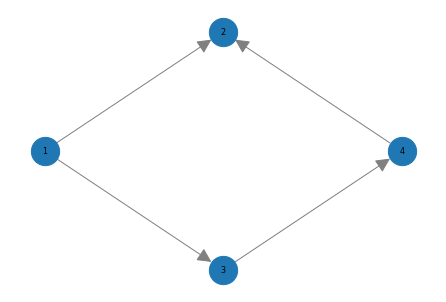

In [101]:
node_position = {'1': [1,1], '2': [2,2], '3': [2,0], '4': [3,1]}
#node_position = {"A": [0,0], "B": [0,1], "C": [1,0], "D": [1,1], "E":[0,5]}
draw_graph(G, node_position, True)

In [102]:
nodePrice = {'1':0 , '2':3, '3':0, '4':5}

In [103]:
source = "1"
#target= "4"
# multiple targets
target=["2", "4"]

# keep a track of current nodes Path
Path=[]
Path.append(source)

# create a list of high price nodes
highpriceNode =[]

The path is: ['1']
The current K node is: 1
The succ node is: 3
Downhill Extend path to succ node and update the price of k

The latest price is: {'1': 1, '2': 3, '3': 0, '4': 5}

The latest path is: ['1', '3']


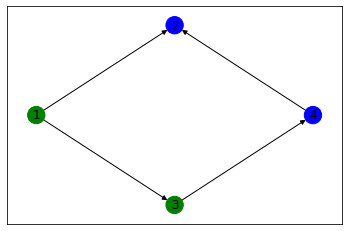

The path is: ['1', '3']
The current K node is: 3
The succ node is: 4

 Uphill- contract and update the price

The updated price is: {'1': 1, '2': 3, '3': 6, '4': 5}

Removing the high price node: 3
The updated Path is: ['1']


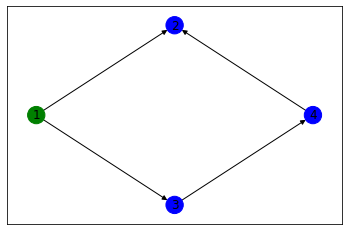

The path is: ['1']
The current K node is: 1
The succ node is: 2
Downhill Extend path to succ node and update the price of k

The latest price is: {'1': 4, '2': 3, '3': 6, '4': 5}

The latest path is: ['1', '2']
Path to 1 th target is: ['1', '2']
The destination reached are 2


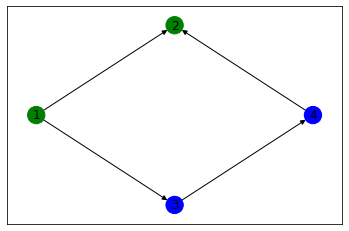

Terminal node reached, set the price to infinity and contract - remove the node
The new path is ['1']
The path is: ['1']
The current K node is: 1
The succ node is: 3
Downhill Extend path to succ node and update the price of k

The latest price is: {'1': 7, '2': 1000000, '3': 6, '4': 5}

The latest path is: ['1', '3']


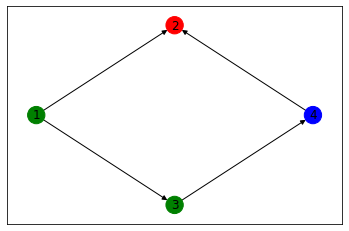

The path is: ['1', '3']
The current K node is: 3
The succ node is: 4
Downhill Extend path to succ node and set the price of k to pred node

The latest price is: {'1': 7, '2': 1000000, '3': 7, '4': 5}

The latest path is: ['1', '3', '4']
Path to 2 th target is: ['1', '3', '4']
The destination reached are 2 4


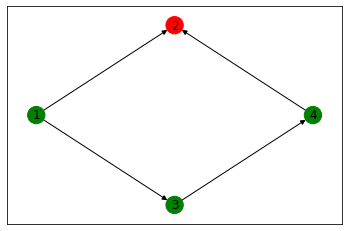

all destination reached

The path is: ['1', '3', '4']
The price of each node is: {'1': 7, '2': 1000000, '3': 7, '4': 5}
The number of steps 5
The destination reached are 2 4


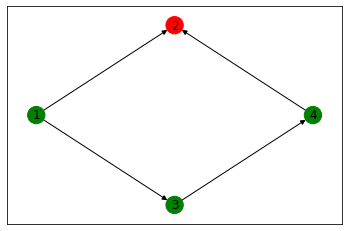

In [104]:
update_price(Path)

In [95]:
# Example 5
# 6 node example 
G = nx.DiGraph()
V = {'1', '3', '4', '5', '6', '7'}
E = [ ('1','3'), ('3','4'), ('3','5'), ('3','6'), ('3','7')]
G.add_nodes_from(V)
G.add_edges_from(E)

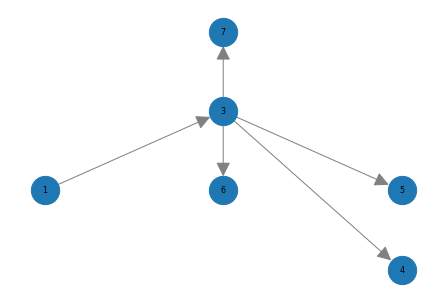

In [96]:
node_position = {'1': [1,1], '3': [2,2], '4': [3,0], '5': [3,1], '6': [2,1],'7': [2,3]}
#node_position = {"A": [0,0], "B": [0,1], "C": [1,0], "D": [1,1], "E":[0,5]}
draw_graph(G, node_position, True)

In [97]:
nodePrice = {'1':0 , '3':0, '4':5, '5':7,'6':8, '7':9 }

In [98]:
source = "1"

# multiple targets
target=["5", "6"]

# keep a track of current nodes Path
Path=[]
Path.append(source)

# create a list of high price nodes
highpriceNode =[]

The path is: ['1']
The current K node is: 1
The succ node is: 3
Downhill Extend path to succ node and update the price of k

The latest price is: {'1': 1, '3': 0, '4': 5, '5': 7, '6': 8, '7': 9}

The latest path is: ['1', '3']


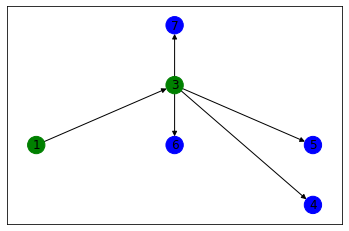

The path is: ['1', '3']
The current K node is: 3
The succ node is: 4

 Uphill- contract and update the price

The updated price is: {'1': 1, '3': 6, '4': 5, '5': 7, '6': 8, '7': 9}

Removing the high price node: 3
The updated Path is: ['1']


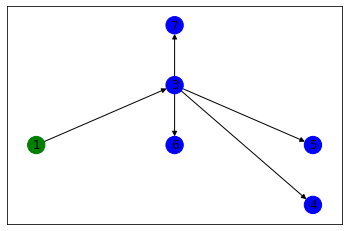

The path is: ['1']
The current K node is: 1
The succ node is: 3
Downhill Extend path to succ node and update the price of k

The latest price is: {'1': 7, '3': 6, '4': 5, '5': 7, '6': 8, '7': 9}

The latest path is: ['1', '3']


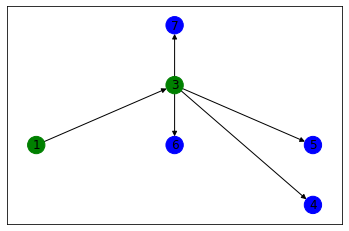

The path is: ['1', '3']
The current K node is: 3
The succ node is: 4
Downhill Extend path to succ node and set the price of k to pred node

The latest price is: {'1': 7, '3': 7, '4': 5, '5': 7, '6': 8, '7': 9}

The latest path is: ['1', '3', '4']
The destination reached are


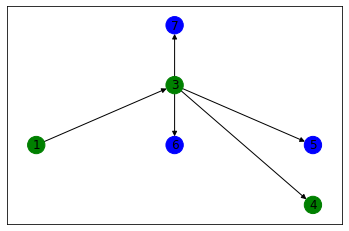

Terminal node reached, set the price to infinity and contract - remove the node
The new path is ['1', '3']
The path is: ['1', '3']
The current K node is: 3
The succ node is: 5

same level Case 2- Contract, remove the node and update the price

Removing the high price node: 3
The updated Path is: ['1']


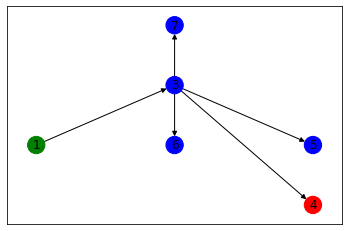

The path is: ['1']
The current K node is: 1
The succ node is: 3
Downhill Extend path to succ node and update the price of k

The latest price is: {'1': 9, '3': 8, '4': 1000000, '5': 7, '6': 8, '7': 9}

The latest path is: ['1', '3']


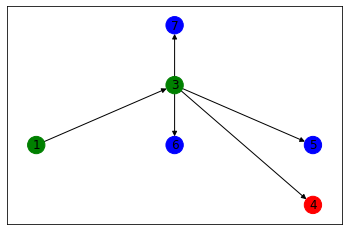

The path is: ['1', '3']
The current K node is: 3
The succ node is: 5
Downhill Extend path to succ node and set the price of k to pred node

The latest price is: {'1': 9, '3': 9, '4': 1000000, '5': 7, '6': 8, '7': 9}

The latest path is: ['1', '3', '5']
Path to 1 th target is: ['1', '3', '5']
The destination reached are 5


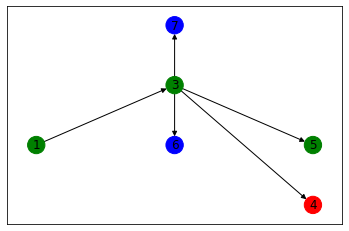

Terminal node reached, set the price to infinity and contract - remove the node
The new path is ['1', '3']
The path is: ['1', '3']
The current K node is: 3
The succ node is: 6
Downhill Extend path to succ node and set the price of k to pred node

The latest price is: {'1': 9, '3': 9, '4': 1000000, '5': 1000000, '6': 8, '7': 9}

The latest path is: ['1', '3', '6']
Path to 2 th target is: ['1', '3', '6']
The destination reached are 5 6


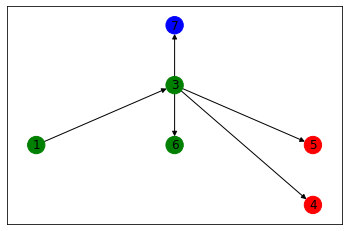

all destination reached

The path is: ['1', '3', '6']
The price of each node is: {'1': 9, '3': 9, '4': 1000000, '5': 1000000, '6': 8, '7': 9}
The number of steps 8
The destination reached are 5 6


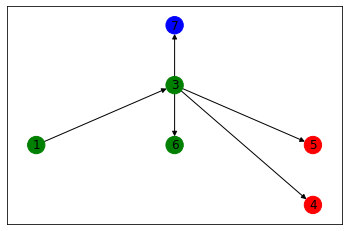

In [99]:
update_price(Path)